In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import os, glob

from owlready2 import *
import owlready2
print(owlready2.VERSION)


import importlib.util
import sys
spec = importlib.util.spec_from_file_location("rdfutils", "../../../utils/rdfutils.py")
u = importlib.util.module_from_spec(spec)
sys.modules["rdfutils"] = u
spec.loader.exec_module(u)

from datetime import datetime

def NOW():
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    return "Current Time = "+ str(current_time)




0.40


* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


In [3]:
if 0:
    pathrdfin  = "WIP_1.owl"
    onto = get_ontology(pathrdfin).load()
    dIDct = u.createDict(onto) 

    ALL = []
    for p in [x for x in onto.ISO_Purpose.instances()]:
        risks = p.has_Impact_RiskISO
        for r in risks:
            MAP = [r.name.split("_")[-1],r.has_RiskISO_Impact[0].label[0], r.has_RiskISO_Purpose[0].label[0]]
            ALL.append(MAP)

    A = [x for x in onto.ISO_Purpose.instances()]
    a = A[0]

    df = pd.DataFrame(ALL,columns = ["ID","Impact","Purpose"])


    IMPACT = list(df.groupby("Impact").count().reset_index().sort_values(by="ID",ascending=False).reset_index(drop=True)[:6].Impact)
    IMPACT
    PURPOSE = list(df.groupby("Purpose").count().reset_index().sort_values(by="ID",ascending=False).reset_index(drop=True)[:12].Purpose)
    PURPOSE

# Start from Python

In [4]:
# sns.heatmap().
df = pd.read_parquet("df_iso_done.parquet.gzip")
print(len(df))
df = df[["ID","Purpose","Issue"]]
df["cnt"] = 1
DF = df.groupby(["Purpose","Issue"]).count()
D = DF.unstack("Issue").fillna(0)
D

214


ID  \
Issue                                       Biodiversity and ecosystem services   
Purpose                                                                           
Attractiveness                                                              1.0   
Preservation and improvement of environment                                 6.0   
Resilience                                                                  4.0   
Responsible resource use                                                    0.0   
Social cohesion                                                             0.0   
Well-being                                                                  0.0   

                                                                             \
Issue                                       Community smart infrastructures   
Purpose                                                                       
Attractiveness                                                          1.0   
Preservation and improvement of environment                             1.0   
Resilience                                                             18.0   
Responsible resource use                                                6.0   
Social cohesion                                                         0.0   
Well-being                                                              2.0   

                                                                                                \
Issue                                       Economy and sustainable production and consumption   
Purpose                                                                                          
Attractiveness                                                                             1.0   
Preservation and improvement of environment                                                0.0   
Resilience                                                                                 4.0   
Responsible resource use                                                                   2.0   
Social cohesion                                                                            0.0   
Well-being                                                                                 1.0   

                                                                                    \
Issue                                       Governance, empowerment and engagement   
Purpose                                                                              
Attractiveness                                                                 0.0   
Preservation and improvement of environment                                    0.0   
Resilience                                                                     3.0   
Responsible resource use                                                       0.0   
Social cohesion                                                                3.0   
Well-being                                                                     0.0   

                                                                              \
Issue                                       Health and care in the community   
Purpose                                                                        
Attractiveness                                                           0.0   
Preservation and improvement of environment                             24.0   
Resilience                                                              25.0   
Responsible resource use                                                 0.0   
Social cohesion                                                          2.0   
Well-being                                                              39.0   

                                                                                 \
Issue                                       Innovation, creativity and research   
Purpose                                                                 

In [5]:
#pip install nbformat seaborn matplotlib
import seaborn as sns
import numpy as np

In [6]:
DD  = df[["cnt","Purpose","Issue"]]
DD["Purpose"] = DD.Purpose.str.replace("Preservation and improvement of environment","Environment").replace("Responsible resource use","Resources management")
DD

/tmp/ipykernel_16277/1445217998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DD["Purpose"] = DD.Purpose.str.replace("Preservation and improvement of environment","Environment").replace("Responsible resource use","Resources management")


,cnt,Purpose,Issue
0,1,Resilience,Health and care in the community
1,1,Environment,Health and care in the community
2,1,Social cohesion,"Living together, interdependence and mutuality"
3,1,Resilience,"Innovation, creativity and research"
4,1,Resilience,Safety and security
...,...,...,...
209,1,Well-being,Health and care in the community
210,1,Resilience,Community smart infrastructures
211,1,Resilience,Biodiversity and ecosystem services
212,1,Social cohesion,"Living together, interdependence and mutuality"


In [7]:
pivot = pd.pivot_table(DD,index='Purpose', columns='Issue', values='cnt',aggfunc='sum').fillna(0)
pivot

Issue,Biodiversity and ecosystem services,Community smart infrastructures,Economy and sustainable production and consumption,"Governance, empowerment and engagement",Health and care in the community,"Innovation, creativity and research",Living and working environment,"Living together, interdependence and mutuality",Mobility,Safety and security
Purpose,,,,,,,,,,
Attractiveness,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
Environment,6.0,1.0,0.0,0.0,24.0,1.0,1.0,0.0,1.0,0.0
Resilience,4.0,18.0,4.0,3.0,25.0,7.0,1.0,0.0,1.0,31.0
Resources management,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Social cohesion,0.0,0.0,0.0,3.0,2.0,0.0,0.0,9.0,0.0,1.0
Well-being,0.0,2.0,1.0,0.0,39.0,0.0,8.0,0.0,0.0,8.0


In [8]:
rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)

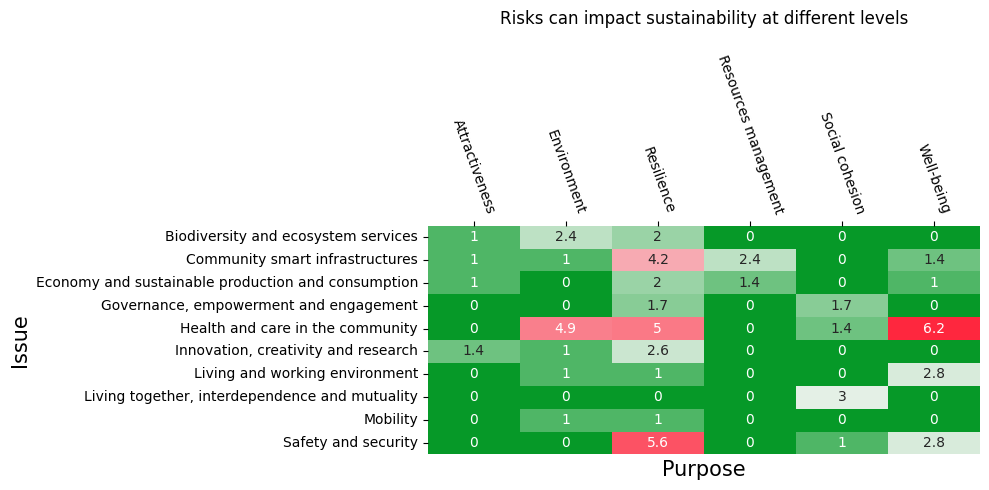

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_title('Risks can impact sustainability at different levels\n')
plt.xlabel('Purposes of sustainability', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Areas of activities', fontsize = 15) # y-axis label with fontsize 15
sns.heatmap(np.sqrt(pivot.T), ax = ax,cmap=rdgn,cbar=False,             annot=True)

ax.xaxis.tick_top() # x axis on top
plt.xticks(rotation=-70)
plt.tight_layout()

# City Anatomy

In [10]:
df = pd.read_parquet("RiskSubgroup_newCAO_classified_lv1.parquet.gzip")
df["value"] = 1
df

,name,category,confidence,src,subcategory,confidence_lv2,value
0,Failure to implement preventive measures,Society,Medium,RiskSubgroup,Accountability,Low,1
1,Lack of access to health services,Structure,High,RiskSubgroup,Settlement,Medium-high,1
2,Public health messaging and education,Interactions,Medium-high,RiskSubgroup,Health,High,1
3,Misinterpretation of data and results,Interactions,Medium-high,RiskSubgroup,Data in/out,High,1
4,Healthcare resource shortage and management,Structure,High,RiskSubgroup,Dwelling,Medium-high,1
...,...,...,...,...,...,...,...
86,Building codes and certification,Structure,High,RiskSubgroup,Buildings/Blocks,Medium-high,1
87,Bioterrorism threats,Interactions,High,RiskSubgroup,Security,High,1
88,Technology deployment and surveillance,Interactions,High,RiskSubgroup,Security,High,1
89,Healthcare legislation,Society,Medium-high,RiskSubgroup,Laws&Regulations,High,1


In [11]:
import plotly.express as px

In [12]:
fig = px.sunburst(df, path=['category', 'subcategory','name'], values='value',width=1200, height=1200)
fig.show()

In [16]:
fig.write_image("sunburst.png")